In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# 1- Data Understanding and Preperation

In [2]:
#Reading the dataset.
df = pd.read_excel('online_retail_II.xlsx', sheet_name="Year 2010-2011")

In [3]:
#Copying the dataset.
dfCopy = df.copy()

In [4]:
dfCopy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Bu bölümde veri setinin betimsel istatistiklerine bakmak önemlidir.
# Eğer bir aykırılık göze çarparsa bu aykırlığı gidermek için işlemler yapmamız gerekir.
# Aşağıda ürün adeti(Quantity) ve ürün fiyatınının(Price) istatistiklerini incelediğimizde ;
# İki değişkenin de %99'luk ve maksimum değerleri arasında ciddi bir aykırılık görülmektedir.

In [6]:
#Examining the descriptive statistics of the dataset.
dfCopy.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
#Checking null variables.
#Is there any missing value in DataFrame?
dfCopy.isna().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [8]:
print(f"Yes, Customer ID column missing: {dfCopy['Customer ID'].isna().sum()} rows.")

Yes, Customer ID column missing: 135080 rows.


In [9]:
#Removing null variables.
dfCopy.dropna(thresh=None, subset=None, inplace=True)

In [10]:
print(dfCopy.isnull().sum())

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [11]:
#How many unique products in DataFrame?
print("Veri setindeki eşsiz ürün sayısı: " + str(dfCopy["Description"].nunique()))

Veri setindeki eşsiz ürün sayısı: 3896


In [12]:
#How many of each product in DataFrame?
print("Veri setindeki ürünlerin adet sayıları:                                                                                                                          " + str(dfCopy['Description'].value_counts()))

Veri setindeki ürünlerin adet sayıları:                                                                                                                          WHITE HANGING HEART T-LIGHT HOLDER     2070
REGENCY CAKESTAND 3 TIER               1905
JUMBO BAG RED RETROSPOT                1662
ASSORTED COLOUR BIRD ORNAMENT          1418
PARTY BUNTING                          1416
                                       ... 
MULTICOLOUR POLKADOT PLATE                1
GLASS BELL JAR LARGE                      1
GIRLY PINK TOOL SET                       1
PEARL & SHELL 42"NECKL. IVORY             1
BLACK GLASS BRACELET W HEART CHARMS       1
Name: Description, Length: 3896, dtype: int64


In [13]:
#What are the top 5 most ordered products? 
dfCopy.groupby("Description").agg({"Quantity":"sum"}).sort_values('Quantity',ascending=False).head(5)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [14]:
#Veri setinde kaç satır kaç sütun vardır?
print("Veri çerçevesinin boyutu: " + str(np.shape(dfCopy)))

Veri çerçevesinin boyutu: (406830, 8)


In [15]:
#Remove the canceled invoices from the dataset.
dfCopy = dfCopy[~dfCopy["Invoice"].str.contains("C", na=False)]

In [16]:
dfCopy.shape

(397925, 8)

In [17]:
dfCopy = dfCopy[dfCopy["Quantity"] > 0]

In [18]:
dfCopy = dfCopy[dfCopy['Country'] == 'United Kingdom']

In [19]:
dfCopy.shape

(354345, 8)

In [20]:
dfCopy

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [21]:
dfCopy.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,354345.0,12.048913,190.428127,1.0,1.00,2.00,4.00,12.00,100.00,80995.00
Price,354345.0,2.963793,17.862067,0.0,0.21,1.25,1.95,3.75,12.75,8142.75
Customer ID,354345.0,15552.436219,1594.546025,12346.0,12748.00,14194.00,15522.00,16931.00,18223.00,18287.00


In [22]:
# Analize gözlem aykırlığını gidererek devam etmemiz gerekiyor.
# Aşağıdaki outlier_thresholds fonksiyonu ile aykırı değerler için bir eşik değer belirliyoruz.
# Alt ve Üst sınır olarak bir eşik değer belirliyoruz. Bu aykırı gözlemler eşik değerin dışında kalıyor.

In [23]:
#Defining functions for outliers.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [24]:
# replace_with_thresholds fonksiyonunda ise aykırı olan değerleri outlier_thresholds fonksiyonunda ;
# saptadığımız eşik değerlerle değiştiriyoruz.
# Yani aykırı değerler artık bizim belirlediğimiz çeyreklikte eşik değerlerle değişmiş oluyor.

In [25]:
#Defining functions to replace outliers.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    #dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [26]:
# Artık hem ürün adeti(Quantity) değişkeninde hem de ürün fiyatı(Price) değişkenindeki aykırlığı giderebiliriz. 

In [27]:
#Replacing outliers in the Quantity and Price columns with the upper limit.
replace_with_thresholds(dfCopy, "Quantity")
replace_with_thresholds(dfCopy, "Price")

dfCopy.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,354345.0,10.676869,22.075531,1.0,1.00,2.00,4.00,12.00,100.00,248.50
Price,354345.0,2.815039,2.920551,0.0,0.21,1.25,1.95,3.75,12.75,31.56
Customer ID,354345.0,15552.436219,1594.546025,12346.0,12748.00,14194.00,15522.00,16931.00,18223.00,18287.00


# 2- Creating RFM Metrics

In [28]:
# Quantity ve Price değişkenleri ürün adet ve her bir ürünün birim fiyatını göstermektedir.
# Biz çalışmamızda toplam fatura fiyatını değerlendireceğiz.
# Bunun için ise "Quantity" ve "Price" değişkenlerindeki gözlemleri çarparak yeni bir "Total Price" değişkeni oluşturacağız.

In [29]:
#Calculating total price per transaction.
dfCopy["TotalPrice"] = dfCopy["Quantity"] * dfCopy["Price"]

In [30]:
# Tüm veri ön işleme adımlarından sonra artık verimizin son halini görebiliriz.
# Artık TotalPrice değişkeni de görülmektedir.

In [31]:
dfCopy.sort_values(by = 'TotalPrice', ascending = False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
23263,538191,22423,REGENCY CAKESTAND 3 TIER,248.5,2010-12-10 10:49:00,10.95,15061.0,United Kingdom,2721.075
411235,572209,23557,LANDMARK FRAME BAKER STREET,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
411234,572209,23553,LANDMARK FRAME CAMDEN TOWN,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
411229,572209,23556,LANDMARK FRAME COVENT GARDEN,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
411230,572209,23554,LANDMARK FRAME OXFORD STREET,248.5,2011-10-21 12:08:00,10.95,18102.0,United Kingdom,2721.075
...,...,...,...,...,...,...,...,...,...
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2011-02-10 13:08:00,0.00,17560.0,United Kingdom,0.000
485985,577696,M,Manual,1.0,2011-11-21 11:57:00,0.00,16406.0,United Kingdom,0.000
446125,574879,22625,RED KITCHEN SCALES,2.0,2011-11-07 13:22:00,0.00,13014.0,United Kingdom,0.000
187613,553000,47566,PARTY BUNTING,4.0,2011-05-12 15:21:00,0.00,17667.0,United Kingdom,0.000


In [32]:
# Veri setindeki maksimum tarihi görelim. Ona göre referans bir tarih belirleyeceğiz.
# Maksimum tarihimiz 09.12.2011
# Referans tarih belirleyeceğiz. Maksimum tarihten 2 gün sonrasını seçeceğiz.

In [33]:
#Defining today date as max(InvoiceDate) + 2 days.
dfCopy["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)
print(f" Maximum invoice date: {dfCopy.InvoiceDate.max()} \n Today date: {today_date}")

 Maximum invoice date: 2011-12-09 12:49:00 
 Today date: 2011-12-11 00:00:00


In [34]:
# Veri setindeki değişkenler ile Receny, Frequency ve Monetary metriklerini oluşturacağız.

In [35]:
#Calculating recency metric.
dfCopy.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days})

,InvoiceDate
Customer ID,
12346.0,326
12747.0,3
12748.0,1
12749.0,4
12820.0,4
...,...
18280.0,278
18281.0,181
18282.0,8


In [36]:
#Calculating frequency metric.
dfCopy.groupby('Customer ID').agg({'Invoice': lambda num: num.nunique()})

,Invoice
Customer ID,
12346.0,1
12747.0,11
12748.0,210
12749.0,5
12820.0,4
...,...
18280.0,1
18281.0,1
18282.0,2


In [37]:
#Calculating monetary metric.
dfCopy.groupby('Customer ID').agg({"TotalPrice": lambda price: price.sum()})

,TotalPrice
Customer ID,
12346.0,258.44
12747.0,4196.01
12748.0,32303.91
12749.0,4072.44
12820.0,942.34
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [38]:
#Assigning your calculated metrics to a variable named rfm.
rfm = dfCopy.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'Invoice': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [39]:
rfm.head()

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.0               0        326        1     258.44
12747.0             366        370       11    4196.01
12748.0             372        374      210   32303.91
12749.0             209        214        5    4072.44
12820.0             323        327        4     942.34

In [40]:
#Changing the names of the metrics we created as recency, frequency and monetary.
rfm.columns = ['recency', 'tenure', 'frequency', 'monetary']
rfm.head()

,recency,tenure,frequency,monetary
Customer ID,,,,
12346.0,0,326,1,258.44
12747.0,366,370,11,4196.01
12748.0,372,374,210,32303.91
12749.0,209,214,5,4072.44
12820.0,323,327,4,942.34


In [41]:
rfm.shape

(3921, 4)

In [42]:
#Calculating average monetary values per order.
rfm["monetary"] = rfm["monetary"] / rfm["frequency"]
#Removing one-time purchases from dataset.
rfm = rfm[(rfm['frequency'] > 1)]
#Copying dataset.
cltv = rfm.copy()

In [43]:
cltv.head()

,recency,tenure,frequency,monetary
Customer ID,,,,
12747.0,366,370,11,381.455455
12748.0,372,374,210,153.828143
12749.0,209,214,5,814.488000
12820.0,323,327,4,235.585000
12822.0,16,88,2,474.440000


In [44]:
cltv.shape

(2570, 4)

In [45]:
cltv.describe([0.01,0.25, 0.50, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
recency,2570.0,199.845525,113.710366,0.00,0.00000,101.000000,209.00,299.000000,368.310000,373.000000
tenure,2570.0,259.546304,103.200072,3.00,23.00000,197.250000,284.00,359.000000,374.000000,374.000000
frequency,2570.0,5.952529,8.412724,2.00,2.00000,2.000000,4.00,6.000000,37.000000,210.000000
monetary,2570.0,344.130219,276.252897,3.45,49.45135,186.749375,289.11,415.880833,1495.901191,3859.601538


# 3- Calculating CLTV

In [46]:
#Remembering required formulas for Customer Lifetime Value Calculation:
#Average_Order_Value = total_price / total_transaction
#Purchase_Frequency = total_transaction / Total_Number_of_Customers
#Customer_Value = Average_Order_Value * Purchase_Frequency
#Churn_Rate = 1 - Repeat_Rate
#Profit_margin = total_price * 0.10
#cltv = (Customer_Value / Churn_Rate) * Profit_margin

In [47]:
#Changing the names of the metrics we created as total_transaction, total_unit and total_price.
cltv.columns = ['total_transaction', 'tenure', 'total_unit', 'total_price']
cltv.head()

,total_transaction,tenure,total_unit,total_price
Customer ID,,,,
12747.0,366,370,11,381.455455
12748.0,372,374,210,153.828143
12749.0,209,214,5,814.488000
12820.0,323,327,4,235.585000
12822.0,16,88,2,474.440000


In [48]:
cltv["Average_Order_Value"] = cltv["total_price"] / cltv["total_transaction"]

In [49]:
#Total_Number_of_Customers:
cltv.shape[0]

cltv["Purchase_Frequency"] = cltv["total_transaction"] / cltv.shape[0]

In [50]:
Repeat_Rate = cltv[cltv.total_transaction > 1].shape[0] / cltv.shape[0]

Churn_Rate = 1 - Repeat_Rate

In [51]:
#Profit margin : 10 %
cltv["Profit_margin"] = cltv["total_price"] * 0.10
cltv.head()

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin
Customer ID,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000


# 4- Calculating for Weekly Values

In [52]:
# BGNB Modeli için haftalık Recency (recency_weekly_p) ve haftalık Tenure (T_weekly) değerlerini hesaplıyoruz.
# Bu değerler kaç hafta önce alışveriş yaptığı ve kaç haftalık müşteri olduğu bilgisini veriyor.
# Kaç hafta önce alışveriş yaptığı:
cltv["recency_weekly_cltv_p"] = cltv["total_transaction"] / 7  
# Kaç haftalık müşteri olduğu:
cltv["T_weekly"] = cltv["tenure"] / 7  

In [53]:
# Kontrol için monetary_avg değerlerinin "0" dan büyük olanları alıyoruz.
cltv = cltv[cltv["total_price"] > 0]

In [54]:
# Daha sağlıklı bir CLTV hesabı için; 
cltv = cltv[(cltv['total_unit'] > 1)]

In [55]:
cltv.head()

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly
Customer ID,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500,46.142857,46.714286
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000,2.285714,12.571429


In [56]:
# BG-NBD ve Gamma-Gamma modelleri frequency değerini float istemiyor.
# O yüzden kontrol amaçlı frequency tipini integer yapıyoruz.
cltv["total_unit"] = cltv["total_unit"].astype(int)

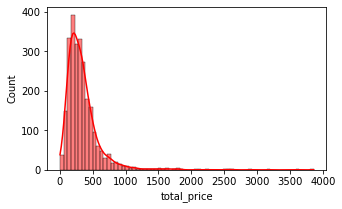

In [57]:
# Her bir müşteri, her bir faturada ortalama ne kadar kazandırmış?
plt.figure(figsize=(5,3))
x = cltv['total_price']

ax = sns.histplot(x, kde=True, color='red', bins=70)

# 5- BG-NBD Model (Expected Number of Transaction)  

In [58]:
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

In [59]:
# BG-NBD modelinin fit edilmesi ile beklenen cltv satış adetlerinin tahminleme adımına geçebiliriz. 
bgf = BetaGeoFitter(penalizer_coef=0.001)
    
bgf.fit(cltv['total_unit'],
        cltv['recency_weekly_cltv_p'],
        cltv['T_weekly'])

<lifetimes.BetaGeoFitter: fitted with 2570 subjects, a: 0.12, alpha: 11.66, b: 2.51, r: 2.21>

In [60]:
#Who are the 10 customers we expect the most to purchase in a week?
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv['total_unit'],
                                                        cltv['recency_weekly_cltv_p'],
                                                        cltv['T_weekly']).sort_values(ascending=False).head(10)


cltv["expected_purc_1_week"] = bgf.predict(1,
                                              cltv['total_unit'],
                                              cltv['recency_weekly_cltv_p'],
                                              cltv['T_weekly'])
cltv.sort_values("expected_purc_1_week", ascending=False).head(10)

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week
Customer ID,,,,,,,,,,
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952
17841.0,371,374,124,328.822339,0.886314,0.144358,32.882234,53.000000,53.428571,1.933252
13089.0,366,370,97,605.186598,1.653515,0.142412,60.518660,52.285714,52.857143,1.532019
14606.0,372,374,93,129.961613,0.349359,0.144747,12.996161,53.142857,53.428571,1.458797
15311.0,373,374,91,667.596813,1.789804,0.145136,66.759681,53.285714,53.428571,1.428625
12971.0,368,373,86,127.049826,0.345244,0.143191,12.704983,52.571429,53.285714,1.352266
13408.0,371,374,62,453.281935,1.221784,0.144358,45.328194,53.000000,53.428571,0.982914
18102.0,366,368,60,3584.887750,9.794775,0.142412,358.488775,52.285714,52.571429,0.965291
13798.0,370,373,57,650.511140,1.758138,0.143969,65.051114,52.857143,53.285714,0.908239


In [61]:
#Who are the 10 customers we expect the most to purchase in a month?
bgf.predict(4,
            cltv['total_unit'],
            cltv['recency_weekly_cltv_p'],
            cltv['T_weekly']).sort_values(ascending=False).head(10)


cltv["expected_purc_1_month"] = bgf.predict(4,
                                               cltv['total_unit'],
                                               cltv['recency_weekly_cltv_p'],
                                               cltv['T_weekly'])


cltv.sort_values("expected_purc_1_month", ascending=False).head(10)

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month
Customer ID,,,,,,,,,,,
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515
17841.0,371,374,124,328.822339,0.886314,0.144358,32.882234,53.000000,53.428571,1.933252,7.712588
13089.0,366,370,97,605.186598,1.653515,0.142412,60.518660,52.285714,52.857143,1.532019,6.111736
14606.0,372,374,93,129.961613,0.349359,0.144747,12.996161,53.142857,53.428571,1.458797,5.819756
15311.0,373,374,91,667.596813,1.789804,0.145136,66.759681,53.285714,53.428571,1.428625,5.699386
12971.0,368,373,86,127.049826,0.345244,0.143191,12.704983,52.571429,53.285714,1.352266,5.394723
13408.0,371,374,62,453.281935,1.221784,0.144358,45.328194,53.000000,53.428571,0.982914,3.921229
18102.0,366,368,60,3584.887750,9.794775,0.142412,358.488775,52.285714,52.571429,0.965291,3.850788
13798.0,370,373,57,650.511140,1.758138,0.143969,65.051114,52.857143,53.285714,0.908239,3.623295


In [62]:
# 6 aylık beklenen cltv satışların tahminini veren kod.
cltv["exp_purc_6_month"] = bgf.predict(24,
                                        cltv['total_unit'],
                                        cltv['recency_weekly_cltv_p'],
                                        cltv['T_weekly'])

In [63]:
# Müşterilerin geleceğe yönelik 1 ve 6 aylık periyotta beklenen satışlarını tabloda görüyoruz.
cltv.head()

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month
Customer ID,,,,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143,0.202479,0.807679,4.766765
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515,76.643827
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429,0.167149,0.665729,3.898353
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500,46.142857,46.714286,0.103972,0.414566,2.441310
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000,2.285714,12.571429,0.129141,0.512653,2.958329


# 6- GAMMA-GAMMA Model (Expected Average Profit)

In [64]:
# Gamma-Gamma modelinin fit edilmesi ile beklenen karlılık tahminleme adımına geçebiliriz. 
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv['total_unit'], cltv['total_price'])

# Top 10 most profitable customers:
ggf.conditional_expected_average_profit(cltv['total_unit'],
                                        cltv['total_price']).sort_values(ascending=False).head(10)

cltv["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv['total_unit'],
                                                                         cltv['total_price'])
cltv.sort_values("expected_average_profit", ascending=False).head(10)

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit
Customer ID,,,,,,,,,,,,,
14088.0,312,323,13,3859.601538,12.370518,0.121401,385.960154,44.571429,46.142857,0.259732,1.035750,6.103208,3911.318850
18102.0,366,368,60,3584.887750,9.794775,0.142412,358.488775,52.285714,52.571429,0.965291,3.850788,22.736008,3595.192557
14096.0,97,102,17,3159.077059,32.567805,0.037743,315.907706,13.857143,14.571429,0.723053,2.873545,16.661604,3191.386734
17511.0,370,374,31,2921.951935,7.897167,0.143969,292.195194,52.857143,53.428571,0.507374,2.024069,11.951480,2938.274487
15749.0,97,333,3,2521.446667,25.994296,0.037743,252.144667,13.857143,47.571429,0.028381,0.113163,0.666393,2675.118999
17450.0,359,368,46,2629.529891,7.324596,0.139689,262.952989,51.285714,52.571429,0.745075,2.972272,17.548364,2639.419342
13081.0,359,372,11,2575.622727,7.174437,0.139689,257.562273,51.285714,53.142857,0.200947,0.801576,4.731047,2616.624391
16984.0,41,131,2,2240.675000,54.650610,0.015953,224.067500,5.857143,18.714286,0.103307,0.410693,2.384439,2452.124911
16000.0,0,3,3,2055.786667,inf,0.000000,205.578667,0.000000,0.428571,0.416012,1.640945,9.260343,2181.323596


# 7- Calculating CLTV with BG-NBD and GAMMA-GAMMA Models

In [65]:
# Müşterilerin 6 aylık CLTV_p değerini hesaplıyoruz
cltv_model = ggf.customer_lifetime_value(bgf,
                                    cltv['total_unit'],
                                    cltv['recency_weekly_cltv_p'],
                                    cltv['T_weekly'],
                                    cltv['total_price'],
                                    time=6,
                                    freq="W",
                                    discount_rate=0.01)

In [66]:
cltv_model

Customer ID
12747.0     1937.046140
12748.0    12365.796180
12749.0     3446.010436
12820.0      631.939332
12822.0     1612.096652
               ...     
18272.0     2225.475813
18273.0      187.883182
18282.0      325.417044
18283.0      983.345974
18287.0     1918.127464
Name: clv, Length: 2570, dtype: float64

In [67]:
cltv['clv_6_months'] = ggf.customer_lifetime_value(bgf,
                                                   cltv['total_unit'],
                                                   cltv['recency_weekly_cltv_p'],
                                                   cltv['T_weekly'],
                                                   cltv['total_price'],
                                                   time=6,
                                                   freq="W",
                                                   discount_rate=0.01)
cltv.head()

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit,clv_6_months
Customer ID,,,,,,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143,0.202479,0.807679,4.766765,387.822846,1937.046140
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515,76.643827,153.971325,12365.796180
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429,0.167149,0.665729,3.898353,844.094697,3446.010436
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500,46.142857,46.714286,0.103972,0.414566,2.441310,247.080949,631.939332
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000,2.285714,12.571429,0.129141,0.512653,2.958329,520.828195,1612.096652


cltv = cltv.merge(cltv_model, on="Customer ID", how="left")
cltv.rename(columns={'clv': 'clv_6_months'}) 
cltv.head()

In [68]:
#Analyzing the top 10 people at 1 month CLTV and the 10 highest at 12 months.
a = ggf.customer_lifetime_value(bgf,
                                   cltv['total_unit'],
                                   cltv['recency_weekly_cltv_p'],
                                   cltv['T_weekly'],
                                   cltv['total_price'],
                                   time=1,  # 1 month
                                   freq="W",  # Weekly
                                   discount_rate=0.01)

b = ggf.customer_lifetime_value(bgf,
                                   cltv['total_unit'],
                                   cltv['recency_weekly_cltv_p'],
                                   cltv['T_weekly'],
                                   cltv['total_price'],
                                   time=12,  # 12 months
                                   freq="W",  # Weekly
                                   discount_rate=0.01)

In [69]:
a

Customer ID
12747.0     336.778826
12748.0    2148.375671
12749.0     604.071001
12820.0     110.124851
12822.0     286.922336
              ...     
18272.0     389.217366
18273.0      32.860604
18282.0      57.583288
18283.0     171.131792
18287.0     336.728747
Name: clv, Length: 2570, dtype: float64

cltv = cltv.merge(a, on="Customer ID", how="left")
cltv.rename(columns={'clv': 'clv_1_months'}, inplace = True) 
cltv.head()

In [70]:
cltv['clv_1_months'] = ggf.customer_lifetime_value(bgf,
                                   cltv['total_unit'],
                                   cltv['recency_weekly_cltv_p'],
                                   cltv['T_weekly'],
                                   cltv['total_price'],
                                   time=1,  # 1 month
                                   freq="W",  # Weekly
                                   discount_rate=0.01)
cltv.head()

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit,clv_6_months,clv_1_months
Customer ID,,,,,,,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143,0.202479,0.807679,4.766765,387.822846,1937.046140,336.778826
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515,76.643827,153.971325,12365.796180,2148.375671
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429,0.167149,0.665729,3.898353,844.094697,3446.010436,604.071001
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500,46.142857,46.714286,0.103972,0.414566,2.441310,247.080949,631.939332,110.124851
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000,2.285714,12.571429,0.129141,0.512653,2.958329,520.828195,1612.096652,286.922336


In [71]:
b

Customer ID
12747.0     3698.381136
12748.0    23623.996889
12749.0     6538.827675
12820.0     1204.326224
12822.0     3029.794538
               ...     
18272.0     4229.848194
18273.0      357.080511
18282.0      613.668833
18283.0     1876.046562
18287.0     3635.913661
Name: clv, Length: 2570, dtype: float64

cltv = cltv.merge(b, on="Customer ID", how="left")
cltv.rename(columns={'clv': 'clv_12_months'}) 
cltv.head()

In [72]:
cltv['clv_12_months'] =  ggf.customer_lifetime_value(bgf,
                                   cltv['total_unit'],
                                   cltv['recency_weekly_cltv_p'],
                                   cltv['T_weekly'],
                                   cltv['total_price'],
                                   time=12,  # 12 months
                                   freq="W",  # Weekly
                                   discount_rate=0.01)
cltv.head()

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit,clv_6_months,clv_1_months,clv_12_months
Customer ID,,,,,,,,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143,0.202479,0.807679,4.766765,387.822846,1937.046140,336.778826,3698.381136
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515,76.643827,153.971325,12365.796180,2148.375671,23623.996889
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429,0.167149,0.665729,3.898353,844.094697,3446.010436,604.071001,6538.827675
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500,46.142857,46.714286,0.103972,0.414566,2.441310,247.080949,631.939332,110.124851,1204.326224
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000,2.285714,12.571429,0.129141,0.512653,2.958329,520.828195,1612.096652,286.922336,3029.794538


# 8- Creating Segments by CLTV

In [73]:
# Her bir müşteri için cltv_p tahminini hesaplamış olduk.
# 1-100 arasında puanlayarak daha iyi okunabilmesini sağlayalım.
scaler = MinMaxScaler(feature_range=(1, 100))
scaler.fit(cltv[["clv_6_months"]])
cltv["clv_6_months"] = scaler.transform(cltv[["clv_6_months"]])

In [74]:
# 1-100 arasındaki cltv_p değerlerini segmentlere ayırıyoruz.
cltv["cltv_p_segment"] = pd.qcut(cltv["clv_6_months"], 4, labels=["D", "C", "B", "A"])

In [85]:
#6 aylık CLTV Prediction segmentlerini de oluşturmuş olduk.
cltv.head(10)

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit,clv_6_months,clv_1_months,clv_12_months,cltv_p_segment
Customer ID,,,,,,,,,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143,0.202479,0.807679,4.766765,387.822846,3.238941,336.778826,3698.381136,A
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515,76.643827,153.971325,15.293046,2148.375671,23623.996889,A
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429,0.167149,0.665729,3.898353,844.094697,4.983082,604.071001,6538.827675,A
12820.0,323,327,4,235.585000,0.729365,0.125681,23.558500,46.142857,46.714286,0.103972,0.414566,2.441310,247.080949,1.730429,110.124851,1204.326224,C
12822.0,16,88,2,474.440000,29.652500,0.006226,47.444000,2.285714,12.571429,0.129141,0.512653,2.958329,520.828195,2.863347,286.922336,3029.794538,B
12823.0,221,297,5,351.900000,1.592308,0.085992,35.190000,31.571429,42.428571,0.122133,0.486879,2.864079,365.132556,2.266247,191.123709,2085.988845,B
12826.0,362,366,7,210.674286,0.581973,0.140856,21.067429,51.714286,52.285714,0.141820,0.565672,3.337204,216.496557,1.874998,131.669433,1444.880555,C
12827.0,38,45,3,143.383333,3.773246,0.014786,14.338333,5.428571,6.428571,0.277511,1.099268,6.291455,153.371927,2.166422,181.133607,1888.157747,B
12828.0,127,131,6,169.785000,1.336890,0.049416,16.978500,18.142857,18.714286,0.265027,1.053936,6.127787,175.407054,2.300466,198.695790,2124.465178,B


In [99]:
#Segment-based customer descriptive statistics:
cltv1=cltv.groupby("cltv_p_segment").agg(   {"count", "mean", "sum"})

In [100]:
cltv1

total_transaction                    tenure                \
                            mean     sum count        mean     sum count   
cltv_p_segment                                                             
D                     154.469673   99324   643  283.562986  182331   643   
C                     215.855140  138579   642  267.158879  171516   642   
B                     208.872274  134096   642  245.819315  157816   642   
A                     220.223950  141604   643  241.634526  155371   643   

               total_unit             total_price  ...  \
                     mean   sum count        mean  ...   
cltv_p_segment                                     ...   
D                3.068429  1973   643  177.424994  ...   
C                3.990654  2562   642  260.689265  ...   
B                5.454829  3502   642  351.986856  ...   
A               11.292379  7261   643  586.302213  ...   

               expected_average_profit clv_6_months                     \
                                 count         mean          sum count   
cltv_p_segment                                                           
D                                  643     1.311464   843.271588   643   
C                                  642     1.821608  1169.472271   642   
B                                  642     2.469497  1585.417327   642   
A                                  643     5.399581  3471.930507   643   

               clv_1_months                      clv_12_months                \
                       mean            sum count          mean           sum   
cltv_p_segment                                                                 
D                 47.141651   30312.081541   643    512.170590  3.293257e+05   
C                124.439389   79890.087851   642   1350.500516  8.670213e+05   
B                223.058686  143203.676193   642   2412.301007  1.548697e+06   
A                667.433753  429159.903209   643   7227.146967  4.647055e+06   

                      
               count  
cltv_p_segment        
D                643  
C                642  
B                642  
A                643  

[4 rows x 48 columns]

In [90]:
cltv_segment_A = cltv[cltv.cltv_p_segment == 'A']

cltv_segment_D = cltv[cltv.cltv_p_segment == 'D']

In [91]:
#Selecting the Customer IDs of the "A" class.
cltv_segment_A

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit,clv_6_months,clv_1_months,clv_12_months,cltv_p_segment
Customer ID,,,,,,,,,,,,,,,,,
12747.0,366,370,11,381.455455,1.042228,0.142412,38.145545,52.285714,52.857143,0.202479,0.807679,4.766765,387.822846,3.238941,336.778826,3698.381136,A
12748.0,372,374,210,153.828143,0.413517,0.144747,15.382814,53.142857,53.428571,3.252952,12.977515,76.643827,153.971325,15.293046,2148.375671,23623.996889,A
12749.0,209,214,5,814.488000,3.897072,0.081323,81.448800,29.857143,30.571429,0.167149,0.665729,3.898353,844.094697,4.983082,604.071001,6538.827675,A
12830.0,134,172,6,870.882500,6.499123,0.052140,87.088250,19.142857,24.571429,0.213655,0.850410,4.964718,897.063780,6.389871,820.013436,8829.209162,A
12836.0,252,312,4,653.215000,2.592123,0.098054,65.321500,36.000000,44.571429,0.104175,0.415329,2.444314,683.354393,3.022554,305.130500,3333.124030,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18226.0,293,338,11,475.277273,1.622107,0.114008,47.527727,41.857143,48.285714,0.211336,0.842834,4.968816,483.125614,3.907127,437.788912,4797.717495,A
18229.0,361,374,20,363.845000,1.007881,0.140467,36.384500,51.571429,53.428571,0.337473,1.346255,7.948260,367.170557,4.534575,531.460632,5840.418078,A
18242.0,141,214,4,558.122500,3.958316,0.054864,55.812250,20.142857,30.571429,0.130701,0.520539,3.047463,584.016863,3.154289,326.795198,3535.972544,A


In [92]:
#Selecting the Customer IDs of the "D" class.
cltv_segment_D

,total_transaction,tenure,total_unit,total_price,Average_Order_Value,Purchase_Frequency,Profit_margin,recency_weekly_cltv_p,T_weekly,expected_purc_1_week,expected_purc_1_month,exp_purc_6_month,expected_average_profit,clv_6_months,clv_1_months,clv_12_months,cltv_p_segment
Customer ID,,,,,,,,,,,,,,,,,
12829.0,23,361,2,138.110000,6.004783,0.008949,13.811000,3.285714,51.571429,0.004275,0.017048,0.100462,153.066813,1.018622,2.805511,30.720050,D
12845.0,22,291,4,88.522500,4.023750,0.008560,8.852250,3.142857,41.571429,0.001896,0.007557,0.044433,93.453424,1.005028,0.759230,8.279366,D
12868.0,187,374,6,267.843333,1.432317,0.072763,26.784333,26.714286,53.428571,0.057373,0.228850,1.350326,276.340884,1.451920,67.993473,746.353116,D
12871.0,123,208,2,190.320000,1.547317,0.047860,19.032000,17.571429,29.714286,0.088837,0.353725,2.068422,210.156046,1.526122,79.908567,862.790883,D
12872.0,38,366,2,299.985000,7.894342,0.014786,29.998500,5.428571,52.285714,0.006795,0.027099,0.159719,330.069678,1.063842,9.616504,105.334249,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18232.0,115,198,4,148.242500,1.289065,0.044747,14.824250,16.428571,28.285714,0.130523,0.519703,3.039094,155.839388,1.573230,87.060013,940.101297,D
18239.0,153,373,5,312.322000,2.041320,0.059533,31.232200,21.857143,53.285714,0.035477,0.141505,0.834814,324.153621,1.327728,49.316429,541.173231,D
18270.0,228,267,2,141.575000,0.620943,0.088716,14.157500,32.571429,38.142857,0.080076,0.319076,1.872654,156.855631,1.355607,53.804136,584.744619,D


In [106]:
cltv_segment_A.reset_index(inplace=True)

In [112]:
cltv_segment_A.to_excel(r'C:\Users\seda.sezgin\OneDrive - Vakko Tekstil ve Hazır Giyim İşl. Sanayi A.Ş\Desktop\VBO\week3\cltv_prediction.xlsx', sheet_name='cltv_segment_A', index = False)

In [113]:
cltv_segment_D.reset_index(inplace=True)

In [114]:
cltv_segment_D.to_excel(r'C:\Users\seda.sezgin\OneDrive - Vakko Tekstil ve Hazır Giyim İşl. Sanayi A.Ş\Desktop\VBO\week3\cltv_prediction.xlsx', sheet_name='cltv_segment_D', index = False)